In [1]:
import numpy as np
from squlearn.feature_map.layered_feature_map import LayeredFeatureMap, Layer, LayeredPQC, VariableGroup

hallihallo
hallihallo
hallihallo
hallihallo
hallo3
hallihallo
hallo


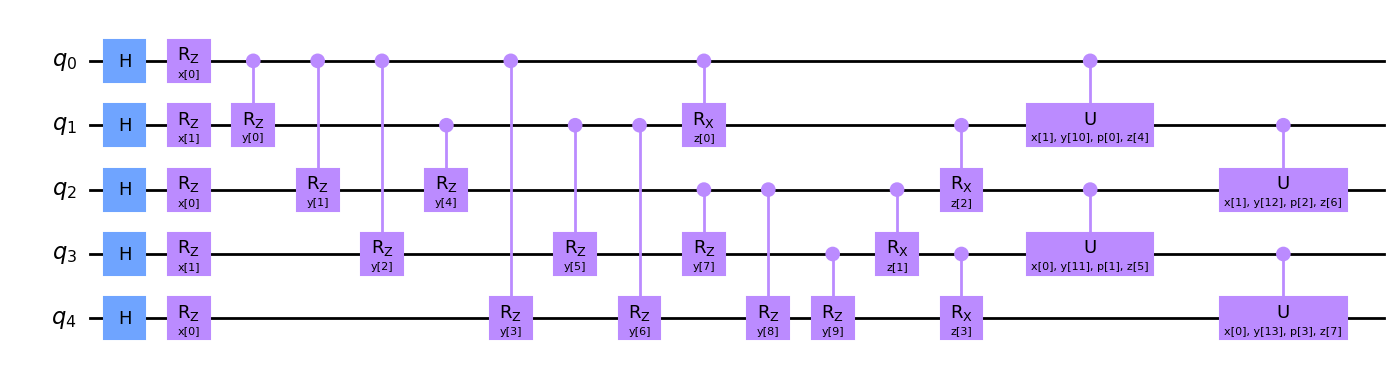

In [4]:
x=VariableGroup("x",2)
p=VariableGroup("p")
y=VariableGroup("y")
z=VariableGroup("z")

pqc = LayeredPQC(num_qubits=4,variable_groups=[x,p,y,z])

pqc.H()
pqc.Rz(x)
pqc.crz_entangling(y,ent_strategy="AA")
pqc.crx_entangling(z,ent_strategy="NN")
pqc.cu_entangling(x,y,p,z)



xx = x.get_param_vector()
pp = p.get_param_vector()
yy= y.get_param_vector()
zz= z.get_param_vector()

pqc.get_circuit(xx,pp,yy,zz).draw()





hallo


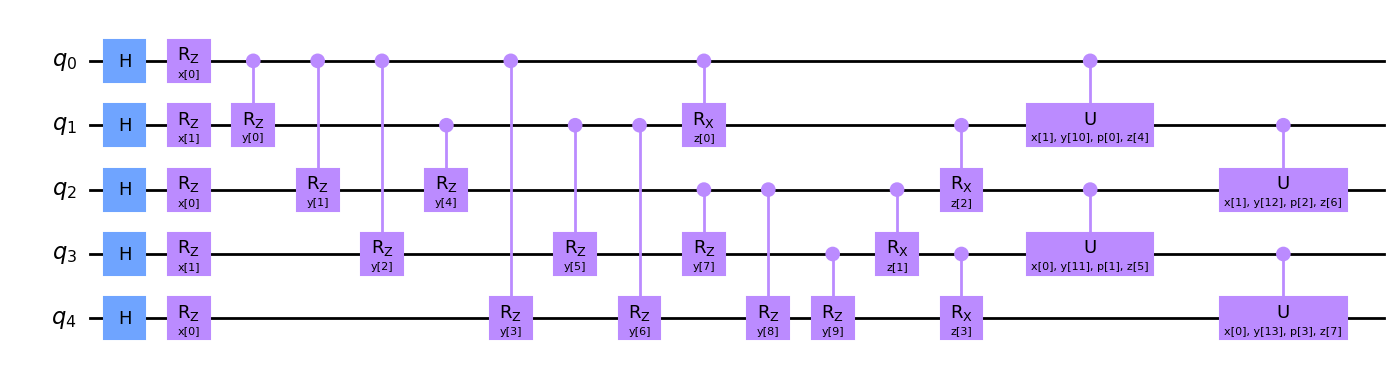

In [5]:
pqc.set_params(num_qubits=5)
xx = x.get_param_vector()
pp = p.get_param_vector()
yy= y.get_param_vector()
zz= z.get_param_vector()

pqc.get_circuit(xx,pp,yy,zz).draw()


In [ ]:
feature_map = LayeredFeatureMap(num_qubits=4,num_features=2)
feature_map.H()
feature_map.Rz("x")
#feature_map.Ry("y")
feature_map.cu_entangling(p,x,y)
feature_map.crx_entangling("p")

#feature_map.cx_entangling("NN")
feature_map.set_params(num_qubits = 8)
feature_map.draw()

hallihallo
hallihallo
hallo2
ent_strategy NN
<class 'str'>
(<squlearn.feature_map.layered_feature_map.VariableGroup object at 0x000001FE1EFD90C0>, <squlearn.feature_map.layered_feature_map.VariableGroup object at 0x000001FE2D4AD1E0>, <squlearn.feature_map.layered_feature_map.VariableGroup object at 0x000001FE2D4ACC70>)


ValueError: Unknown variable type!

hallihallo
hallihallo
hallo


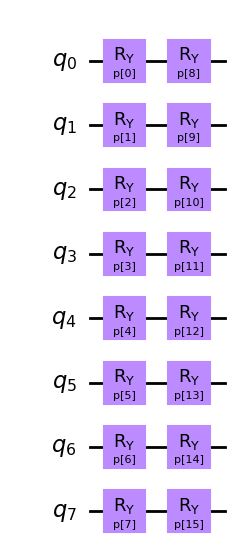

In [ ]:
string_feature_map = LayeredFeatureMap.from_string("Ry(p)",
    num_qubits=5,
    num_features=1,
    num_layers=2,
)
string_feature_map.set_params(num_qubits = 8)
string_feature_map.draw()
